## _kNN_: _k_-Vecinos Cercanos

Es un algoritmo de aprendizaje supervisado en el que se asigna a un punto de prueba, la clase mayoritaria entre los _k_ vecinos más próximos, utilizando una métrica de distancia. En la siguiente figura se puede ver un ejemplo para _k_ = 5
<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1cqxNubMKX-mP3DMfT6HkDdJdU0bn_ur5" width=600></center>
</pre>


## Métricas de distancia

### Minkowski:$\qquad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = [ \sum\limits_{j=1}^{m}{(|x_j^{[a]}-x_j^{[b]}|)^p} ]^{\frac{1}{p}}$

### Manhattan: $\quad p=1 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) =  \sum\limits_{j=1}^{m}{|x_j^{[a]}-x_j^{[b]}|}$

### Euclídea: $\quad p=2 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = \sqrt{ \sum\limits_{j=1}^{m}{(x_j^{[a]}-x_j^{[b]})^2}}$

## KNN usando _scikit-Learn_

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Dataset Iris 
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y el largo y ancho del pétalo, en centímetros. 

>Vamos a utilizar el algoritmo KNN para separar las 3 clases de flores según dos de sus características: Largo de pétalo (**"petal length (cm)"**) y largo de sépalo (**"sepal length (cm)"**).  

### Cargamos los datos

In [ ]:
df_iris = load_iris(as_frame=True).frame

X = df_iris[['petal length (cm)', 'petal width (cm)']]
y = df_iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)
X_test.shape

(45, 2)

In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
test_idx = np.array(X_test.index)
test_idx

array([148,   5,   6, 106,  75,  71, 108,  68, 111,  16,  15, 127,   8,
        57,  47,  76, 141,  66,  74, 147, 102,  12,  65, 121,  94,  56,
        98, 144,  43, 113,  11,   0,  62,  53, 107, 112,  37,  25,   1,
        50, 120, 149,  54,   7,   9], dtype=int64)

### Preprocesamiento de los datos

In [ ]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
sc.fit(X_train)                     
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)   

### Entrenamiento de nuestro clasificador

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sknn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

sknn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

### Graficación

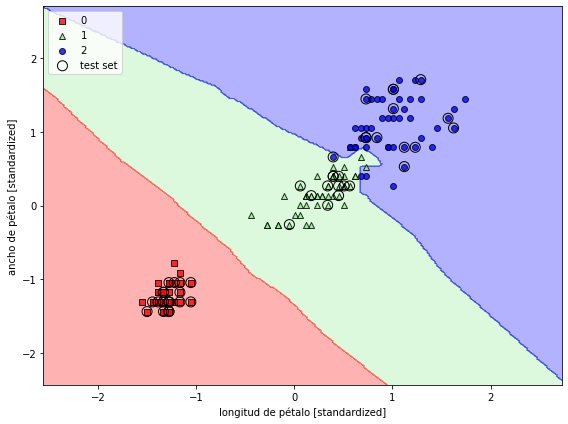

In [ ]:
from modules.funciones_auxiliares import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(8,6))
plot_decision_regions(X_combined_std, y_combined, clasificador=sknn, test_idx=test_idx)
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Evaluación del desempeño

In [ ]:
y_pred = sknn.predict(X_test_std)

print((y_pred==y_test).all()) 

False


In [ ]:
print(sknn.score(X_test_std, y_test))

0.9777777777777777


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9777777777777777